In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from random import sample,seed
import seaborn as sns

%matplotlib inline

# Expressions

wget http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/BRCA/20160128/gdac.broadinstitute.org_BRCA.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.Level_3.2016012800.0.0.tar.gz

tar xzvf gdac.broadinstitute.org_BRCA.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.Level_3.2016012800.0.0.tar.gg


In [3]:
"""df = pd.read_csv("gdac.broadinstitute.org_BRCA.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.Level_3.2016012800.0.0/BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.data.txt",sep="\t",index_col=0)
exprs = df.loc[:,df.T.loc[df.T["gene_id"]=="raw_count",:].index]
exprs = exprs.iloc[1:,:]
exprs = exprs.rename({"SLC35E2|728661":"SLC35E2B|728661","SLC35E2|9906":"SLC35E2A|9906"},axis=0)  # rename SLC35E2 to aviod duplicates  
exprs.head(16310).tail(12)

gnames =  []
for g in exprs.index.values:
    gname, gene_id = g.split("|")
    if gname == "?":
        gname=gene_id # "Entrezid:"+
    gnames.append(gname)
exprs.index = gnames

snames = exprs.columns.values
snames = [x[:15] for x in snames]
exprs.columns  = snames
exprs = exprs.applymap(lambda x : int(round(float(x),0)))
exprs.to_csv("TCGA-BRCA.counts.tsv",sep ="\t")
exprs.head()
"""

'df = pd.read_csv("gdac.broadinstitute.org_BRCA.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.Level_3.2016012800.0.0/BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.data.txt",sep="\t",index_col=0)\nexprs = df.loc[:,df.T.loc[df.T["gene_id"]=="raw_count",:].index]\nexprs = exprs.iloc[1:,:]\nexprs = exprs.rename({"SLC35E2|728661":"SLC35E2B|728661","SLC35E2|9906":"SLC35E2A|9906"},axis=0)  # rename SLC35E2 to aviod duplicates  \nexprs.head(16310).tail(12)\n\ngnames =  []\nfor g in exprs.index.values:\n    gname, gene_id = g.split("|")\n    if gname == "?":\n        gname=gene_id # "Entrezid:"+\n    gnames.append(gname)\nexprs.index = gnames\n\nsnames = exprs.columns.values\nsnames = [x[:15] for x in snames]\nexprs.columns  = snames\nexprs = exprs.applymap(lambda x : int(round(float(x),0)))\nexprs.to_csv("TCGA-BRCA.counts.tsv",sep ="\t")\nexprs.head()\n'

In [2]:
exprs = pd.read_csv("TCGA-BRCA/TCGA-BRCA.counts.tsv",sep = "\t",index_col = 0)
exprs.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
100130426,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100133144,47,17,13,29,16,7,0,3,34,29,...,1,6,0,12,0,0,37,47,4,20
100134869,38,32,10,27,34,23,13,17,32,34,...,36,15,5,30,8,4,54,58,12,71
10357,151,128,170,348,198,195,142,206,258,182,...,340,188,49,270,68,52,350,136,142,482
10431,1184,1037,1501,2092,1801,1377,1360,2716,1459,2956,...,3933,3989,2796,1470,1579,2305,1658,1530,1909,2884


# Annotations 

* keep only samples with expression annotated as Lum or Basal
* with defined stage and known age of onset
1212 --> 850 samples

In [3]:
anno = pd.read_csv("TCGA-BRCA/TCGA.annotation_v2.t.tsv",sep = "\t",index_col = 0)
print(anno[["cohort","mol_subt"]].groupby(["mol_subt"]).agg("count").sort_values(by="cohort",ascending=False))
print(anno.shape[0])
anno.head(10)

          cohort
mol_subt        
LumA         499
LumB         197
Basal        171
Her2          78
Normal        36
1081


,diagnosis_age,menopause_status,hist_subt,mol_subt,oncotree,stage,OS,OS_status,ER,HER2,PR,cohort,age,race,is_hispanic_or_latino,sex,t_stage,m_stage,n_stage
TCGA-OL-A66H-01,NaN,post,Mucinous Carcinoma,LumA,IMMC,1,NaN,LIVING,Positive,NaN,Positive,OL,74,BLACK OR AFRICAN AMERICAN,Not Hispanic Or Latino,Female,T1C,MX,N1MI
TCGA-3C-AALK-01,52.0,NaN,Infiltrating Ductal Carcinoma,LumA,IDC,1,47.57,LIVING,Positive,Positive,Positive,3C,52,BLACK OR AFRICAN AMERICAN,Not Hispanic Or Latino,Female,T1C,M0,N0 (I+)
TCGA-AR-A1AH-01,51.0,post,Infiltrating Ductal Carcinoma,Basal,IDC,2,125.07,LIVING,Positive,Negative,Negative,AR,51,WHITE,Not Hispanic Or Latino,Female,T2,M0,N1
TCGA-AC-A5EH-01,76.0,NaN,Infiltrating Ductal Carcinoma,Her2,IDC,2,16.79,LIVING,Positive,Negative,Negative,AC,76,BLACK OR AFRICAN AMERICAN,Not Hispanic Or Latino,Female,T2,MX,N1MI
TCGA-EW-A2FW-01,52.0,post,Other,LumB,BRCNOS,2,22.08,LIVING,Positive,Negative,Positive,EW,52,WHITE,Hispanic Or Latino,Female,T2,MX,N0 (I-)
TCGA-E9-A1R0-01,58.0,post,Infiltrating Ductal Carcinoma,LumA,IDC,2,28.25,LIVING,NaN,NaN,NaN,E9,58,WHITE,Not Hispanic Or Latino,Female,T1C,M0,N1
TCGA-B6-A2IU-01,62.0,NaN,Infiltrating Lobular Carcinoma,LumA,ILC,2,170.04,LIVING,Positive,NaN,Positive,B6,62,WHITE,Hispanic Or Latino,Female,T2,M0,N0
TCGA-AR-A1AJ-01,83.0,post,Infiltrating Ductal Carcinoma,Basal,IDC,1,100.92,LIVING,Positive,Negative,Negative,AR,83,WHITE,Not Hispanic Or Latino,Female,T1,M0,N0
TCGA-A7-A13G-01,79.0,post,Infiltrating Ductal Carcinoma,LumA,IDC,2,23.59,LIVING,Positive,Negative,Positive,A7,79,WHITE,Not Hispanic Or Latino,Female,T2,MX,N0
TCGA-AC-A62Y-01,79.0,post,Infiltrating Lobular Carcinoma,LumA,ILC,2,17.41,LIVING,Positive,Negative,Positive,AC,79,WHITE,Not Hispanic Or Latino,Female,T2,MX,N1


In [4]:
anno[anno["diagnosis_age"]!= anno["age"]]

,diagnosis_age,menopause_status,hist_subt,mol_subt,oncotree,stage,OS,OS_status,ER,HER2,PR,cohort,age,race,is_hispanic_or_latino,sex,t_stage,m_stage,n_stage
TCGA-OL-A66H-01,NaN,post,Mucinous Carcinoma,LumA,IMMC,1,NaN,LIVING,Positive,NaN,Positive,OL,74,BLACK OR AFRICAN AMERICAN,Not Hispanic Or Latino,Female,T1C,MX,N1MI
TCGA-BH-A0B2-01,NaN,NaN,Infiltrating Ductal Carcinoma,NaN,IDC,1,NaN,NaN,NaN,NaN,NaN,NaN,43,NaN,Not Hispanic Or Latino,NaN,T1A,M0,N0


## TMN 
https://www.cancer.org/cancer/breast-cancer/understanding-a-breast-cancer-diagnosis/stages-of-breast-cancer.html

In [5]:
anno = anno.loc[:,["diagnosis_age","cohort","menopause_status","race",
                   "mol_subt","stage","t_stage","m_stage","n_stage",
                   "ER","HER2","PR"]] # "n_stage","ER","HER2","PR","m_stage"
anno["mol_subt2"] = anno["mol_subt"]
anno.loc[anno["mol_subt"]=="LumA","mol_subt"]  = "Lum"
anno.loc[anno["mol_subt"]=="LumB","mol_subt"]  = "Lum"
anno.loc[anno["mol_subt"]=="Her2","mol_subt"]  = "Other"
anno.loc[anno["mol_subt"]=="Normal","mol_subt"]  = "Other"
anno = anno.loc[anno["mol_subt"]!="Other",:]
print("Only Lum and Basal",anno.shape[0])
anno.dropna(how="any",subset=["mol_subt","diagnosis_age","stage"],inplace = True)
anno = anno.loc[anno["stage"]!="X",:] # TX: The primary tumor cannot be evaluated [cancer.net]
anno["stage"] = anno["stage"].apply(int)
print("with stages 1-4:",anno.shape[0])

#anno = anno.loc[anno["n_stage"]!="NX",:]
anno["spread_to_LN"] = 1
anno.loc[anno["n_stage"].str.contains("N0"),"spread_to_LN"] = 0
anno.loc[anno["n_stage"]=="NX","spread_to_LN"] = np.NaN
#print(anno.shape[0])

#anno = anno.loc[anno["m_stage"]!="MX",:]
anno["is_metastatic"] = 0
anno.loc[anno["m_stage"]!="M0","is_metastatic"] = 1
anno.loc[anno["m_stage"]=="MX","is_metastatic"] = np.NaN
#print(anno.shape[0])

#for r in ["ER","PR","HER2"]:
#    anno[r+"+"] = 0
#    anno.loc[anno[r]=="Positive",r+"+"] = 1
#print(anno.shape[0])

anno["is_LumA"] = 0
anno.loc[anno["mol_subt2"]=="LumA","is_LumA"] = 1

anno["Lum"] = 0
anno.loc[anno["mol_subt"]=="Lum","Lum"] = 1
anno["Basal"] = 0
anno.loc[anno["mol_subt"]=="Basal","Basal"] = 1
anno = anno.loc[:,["diagnosis_age","cohort","race","menopause_status",
                   "Lum","Basal","is_LumA","stage","mol_subt",
                   "ER","PR","HER2","spread_to_LN","is_metastatic"]] # 


anno.head(10)

Only Lum and Basal 967
with stages 1-4: 850


,diagnosis_age,cohort,race,menopause_status,Lum,Basal,is_LumA,stage,mol_subt,ER,PR,HER2,spread_to_LN,is_metastatic
TCGA-3C-AALK-01,52.0,3C,BLACK OR AFRICAN AMERICAN,NaN,1,0,1,1,Lum,Positive,Positive,Positive,0.0,0.0
TCGA-AR-A1AH-01,51.0,AR,WHITE,post,0,1,0,2,Basal,Positive,Negative,Negative,1.0,0.0
TCGA-EW-A2FW-01,52.0,EW,WHITE,post,1,0,0,2,Lum,Positive,Positive,Negative,0.0,NaN
TCGA-E9-A1R0-01,58.0,E9,WHITE,post,1,0,1,2,Lum,NaN,NaN,NaN,1.0,0.0
TCGA-B6-A2IU-01,62.0,B6,WHITE,NaN,1,0,1,2,Lum,Positive,Positive,NaN,0.0,0.0
TCGA-AR-A1AJ-01,83.0,AR,WHITE,post,0,1,0,1,Basal,Positive,Negative,Negative,0.0,0.0
TCGA-A7-A13G-01,79.0,A7,WHITE,post,1,0,1,2,Lum,Positive,Positive,Negative,0.0,NaN
TCGA-AC-A62Y-01,79.0,AC,WHITE,post,1,0,1,2,Lum,Positive,Positive,Negative,1.0,NaN
TCGA-E9-A1QZ-01,61.0,E9,WHITE,post,1,0,1,2,Lum,NaN,NaN,NaN,0.0,0.0
TCGA-E9-A1R2-01,51.0,E9,WHITE,post,1,0,1,3,Lum,Positive,Negative,Equivocal,1.0,NaN


In [6]:
set(anno["stage"].values)#, set(anno["spread_to_LN"].values)

{1, 2, 3, 4}

In [7]:
anno.loc[:,["Basal","is_LumA","diagnosis_age","menopausal_status","race","stage","ER","PR","HER2","spread_to_LN","is_metastatic"]].corr() # 

/home/olya/anaconda3/envs/py3.7/lib/python3.6/site-packages/pandas/core/indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Basal,is_LumA,diagnosis_age,menopausal_status,stage,spread_to_LN,is_metastatic
Basal,1.000000,-0.576259,-0.105400,NaN,-0.040492,-0.128869,0.014704
is_LumA,-0.576259,1.000000,0.074069,NaN,-0.069052,0.028743,-0.013091
diagnosis_age,-0.105400,0.074069,1.000000,NaN,-0.039987,-0.092833,-0.021435
menopausal_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,-0.040492,-0.069052,-0.039987,NaN,1.000000,0.596739,0.308345
spread_to_LN,-0.128869,0.028743,-0.092833,NaN,0.596739,1.000000,0.154541
is_metastatic,0.014704,-0.013091,-0.021435,NaN,0.308345,0.154541,1.000000


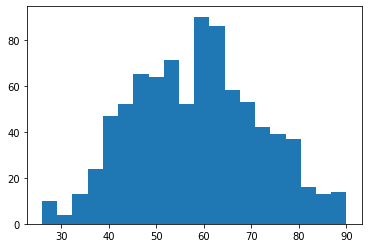

In [8]:
tmp = plt.hist(anno["diagnosis_age"].values,bins=20)


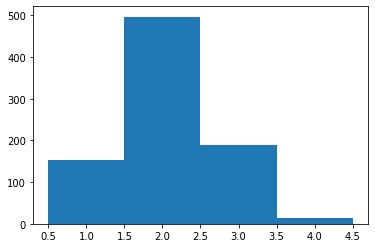

In [9]:
tmp = plt.hist(anno["stage"].values,bins=4,range=(0.5,4.5))


In [10]:
anno.shape

(850, 14)

In [11]:
# keep only annotated 
annotated = set(anno.index.values).intersection(exprs.columns.values)
print("Samples wiht expression and annotation:",len(annotated))
exprs = exprs.loc[:,sorted(annotated)]
anno = anno.loc[sorted(annotated),:]
print("% Luminal :", round(anno["Lum"].sum()/len(annotated),2))
print("\t% Lum B:", round((anno["Lum"].sum() - anno["is_LumA"].sum())/len(annotated),2))
print("\t% Lum A:", round((anno["is_LumA"].sum())/len(annotated),2))
print("% Basal:", round(1.0-anno["Lum"].sum()/len(annotated),2))
print("mean diagnosis age:",round(anno["diagnosis_age"].mean(axis=0),1))
print("mean stage:",round(anno["stage"].mean(axis=0),1))
anno.to_csv("TCGA-BRCA/TCGA.annotation_v3.tsv", sep = "\t")

Samples wiht expression and annotation: 850
% Luminal : 0.8
	% Lum B: 0.23
	% Lum A: 0.57
% Basal: 0.2
mean diagnosis age: 58.4
mean stage: 2.1


In [12]:
c1 = "Lum"
c2 = "Basal"
#anno = anno.loc[anno["hist_subt"]=="Infiltrating Ductal Carcinoma",:]
a1 = anno.loc[anno["mol_subt"]==c1,:]
a2 = anno.loc[anno["mol_subt"]==c2,:]
a1_stat = a1[["cohort","diagnosis_age"]].groupby(["cohort"]).agg("count")
a1_stat.columns = [c1]
a2_stat = a2[["cohort","diagnosis_age"]].groupby(["cohort"]).agg("count")
a2_stat.columns = [c2]
stat = pd.concat([a1_stat,a2_stat],axis =1,sort=True)
stat.fillna(0,inplace = True)
stat["sum"] = stat.sum(axis=1)
stat  = stat.sort_values(by="sum",ascending=False)
stat["mean_age"] = anno[["cohort","diagnosis_age"]].groupby("cohort").agg("mean")
stat["mean_stage"] = anno[["cohort","stage"]].groupby("cohort").agg("mean")
#stat["LN"] = anno[["cohort","spread_to_LN"]].groupby("cohort").agg("mean")
stat["LumA"] = anno[["cohort","is_LumA"]].groupby("cohort").agg("mean")
#stat["ER+"] = anno[["cohort","ER+"]].groupby("cohort").agg("mean")
#stat["PR+"] = anno[["cohort","PR+"]].groupby("cohort").agg("mean")
#stat["HER2+"] = anno[["cohort","HER2+"]].groupby("cohort").agg("mean")
stat

,Lum,Basal,sum,mean_age,mean_stage,LumA
BH,105,18.0,123.0,58.878049,1.886179,0.666667
A2,58,21.0,79.0,57.265823,2.101266,0.506329
E2,57,17.0,74.0,57.405405,1.851351,0.621622
D8,55,10.0,65.0,62.876923,2.092308,0.507692
A8,56,3.0,59.0,65.983051,2.305085,0.508475
E9,47,9.0,56.0,55.857143,2.142857,0.500000
AR,42,14.0,56.0,54.482143,2.089286,0.500000
B6,30,10.0,40.0,55.525000,2.175000,0.600000
AN,28,8.0,36.0,59.111111,2.333333,0.583333
AO,29,7.0,36.0,54.916667,2.111111,0.527778


## Balanced

In [28]:
anno2 = anno.copy()
anno2["split"] = "Split_3"
N = anno.shape[0]*1.0*1.0
N_basal = anno.loc[anno["Basal"]==1,:].shape[0]*1.0
N_lumA = anno.loc[anno["is_LumA"]==1,:].shape[0]*1.0
print(N,N_basal,N_lumA)
random_state = 0
seed(random_state)
n_splits = 3
sizes = [1,1,1]
basal_freqs = [0.2,0.2,0.2]
lumA_freqs = [0.57,0.57,0.57]

Sizes = []
n_basal = []
n_LA = []
for i in range(0,n_splits-1):
    s  = int(N*sizes[i]/sum(sizes))
    Sizes.append(s)
    n_basal.append(int(s*basal_freqs[i]))
    n_LA.append(int(s * lumA_freqs[i]))

Sizes.append(int(N-sum(Sizes)))
n_basal.append(int(N_basal-sum(n_basal)))
n_LA.append(int(N_lumA-sum(n_LA)))
print(Sizes, sum(Sizes))
print(n_basal, sum(n_basal))
print(n_LA, sum(n_LA))
print(n_LA, sum(n_LA))

splits = {}
basal = set(anno.loc[anno["Basal"]==1,:].index.values)
lumA = set(anno.loc[anno["is_LumA"]==1,:].index.values)
other = set(anno.index.values).difference(basal).difference(lumA)
for i in range(0,n_splits-1):
    b = set(sample(basal,n_basal[i]))
    basal =  basal.difference(b)
    la = set(sample(lumA,n_LA[i]))
    lumA = lumA.difference(la)
    o = set(sample(other,Sizes[i]-n_LA[i]-n_basal[i]))
    other = other.difference(o)
    sele_samples = b | la |o
    anno2.loc[sele_samples,"split"] = "Split_"+str(i+1)
    anno2["Split_"+str(i+1)] = 0
    anno2.loc[sele_samples,"Split_"+str(i+1)]  =1
stats = anno2[["split","diagnosis_age","stage","is_LumA","Basal"]].groupby("split").agg("mean")
stats["n_samples"] = anno2[["split","is_LumA"]].groupby("split").agg("count")
stats   

850.0 168.0 488.0
[283, 283, 284] 850
[56, 56, 56] 168
[161, 161, 166] 488
[161, 161, 166] 488


,diagnosis_age,stage,is_LumA,Basal,n_samples
split,,,,,
Split_1,58.000000,2.084806,0.568905,0.197880,283
Split_2,58.876325,2.056537,0.568905,0.197880,283
Split_3,58.309859,2.077465,0.584507,0.197183,284


In [29]:
root_dir = "TCGA-BRCA/"
outdir = root_dir +"/"+"balanced/"
if not os.path.exists(outdir):
    os.makedirs(outdir)
splits = []
for i in range(n_splits):
    s = "Split_"+str(i+1)
    splits.append(s)
    df = anno2.loc[anno2["split"]==s,["Lum","Basal","is_LumA","diagnosis_age","stage"]]
    samples = sorted(df.index.values)
    df.loc[samples,:].to_csv(outdir+"/"+s+".design.tsv",sep = "\t")
    exprs.loc[:,samples ].to_csv(outdir+"/"+s+".counts.tsv",sep = "\t")

df = anno2.loc[:,["Lum","Basal","is_LumA","diagnosis_age","stage"]+splits[:-1]]
samples = sorted(df.index.values)
df.loc[samples,:].to_csv(outdir+"/"+"All.design.tsv",sep = "\t")
exprs.loc[:,samples ].to_csv(outdir+"/"+"All.counts.tsv",sep = "\t")
print(df.shape, exprs.shape)
df.head(3)

(850, 7) (20531, 850)


,Lum,Basal,is_LumA,diagnosis_age,stage,Split_1,Split_2
TCGA-3C-AALJ-01,1,0,0,62.0,2,0,1
TCGA-3C-AALK-01,1,0,1,52.0,1,0,0
TCGA-4H-AAAK-01,1,0,1,50.0,3,1,0


# Imbalanced
 * cohort sizes, % of Basal subtype and % of LumA subtype are imbalanced
 * stage and age are tken as covariates
### Mild imbalance

In [36]:
anno2 = anno.copy()
anno2["split"] = "Split_3"
N = anno.shape[0]*1.0*1.0
N_basal = anno.loc[anno["Basal"]==1,:].shape[0]*1.0
N_lumA = anno.loc[anno["is_LumA"]==1,:].shape[0]*1.0
print(N,N_basal,N_lumA)
random_state = 0
seed(random_state)
n_splits = 3
sizes = [1,2,4]
basal_freqs = [0.1,0.3,0.2]
lumA_freqs = [0.40,0.5,0.65]

Sizes = []
n_basal = []
n_LA = []
for i in range(0,n_splits-1):
    s  = int(N*sizes[i]/sum(sizes))
    Sizes.append(s)
    n_basal.append(int(s*basal_freqs[i]))
    n_LA.append(int(s * lumA_freqs[i]))

Sizes.append(int(N-sum(Sizes)))
n_basal.append(int(N_basal-sum(n_basal)))
n_LA.append(int(N_lumA-sum(n_LA)))
print(Sizes, sum(Sizes))
print(n_basal, sum(n_basal))
print(n_LA, sum(n_LA))

splits = {}
basal = set(anno.loc[anno["Basal"]==1,:].index.values)
lumA = set(anno.loc[anno["is_LumA"]==1,:].index.values)
other = set(anno.index.values).difference(basal).difference(lumA)
for i in range(0,n_splits-1):
    b = set(sample(basal,n_basal[i]))
    basal =  basal.difference(b)
    la = set(sample(lumA,n_LA[i]))
    lumA = lumA.difference(la)
    o = set(sample(other,Sizes[i]-n_LA[i]-n_basal[i]))
    other = other.difference(o)
    sele_samples = b | la |o
    anno2.loc[sele_samples,"split"] = "Split_"+str(i+1)
    anno2["Split_"+str(i+1)] = 0
    anno2.loc[sele_samples,"Split_"+str(i+1)]  =1
stats = anno2[["split","diagnosis_age","stage","is_LumA","Basal"]].groupby("split").agg("mean")
stats["n_samples"] = anno2[["split","is_LumA"]].groupby("split").agg("count")
stats   

850.0 168.0 488.0
[121, 242, 487] 850
[12, 72, 84] 168
[48, 121, 319] 488


,diagnosis_age,stage,is_LumA,Basal,n_samples
split,,,,,
Split_1,59.413223,2.099174,0.396694,0.099174,121
Split_2,57.780992,2.086777,0.500000,0.297521,242
Split_3,58.447639,2.059548,0.655031,0.172485,487


In [37]:
root_dir = "TCGA-BRCA/"
outdir = root_dir +"/"+"mild_imbalance/"
if not os.path.exists(outdir):
    os.makedirs(outdir)
splits = []
for i in range(n_splits):
    s = "Split_"+str(i+1)
    splits.append(s)
    df = anno2.loc[anno2["split"]==s,["Lum","Basal","is_LumA","diagnosis_age","stage"]]
    samples = sorted(df.index.values)
    df.loc[samples,:].to_csv(outdir+"/"+s+".design.tsv",sep = "\t")
    exprs.loc[:,samples ].to_csv(outdir+"/"+s+".counts.tsv",sep = "\t")

df = anno2.loc[:,["Lum","Basal","is_LumA","diagnosis_age","stage"]+splits[:-1]]
samples = sorted(df.index.values)
df.loc[samples,:].to_csv(outdir+"/"+"All.design.tsv",sep = "\t")
exprs.loc[:,samples ].to_csv(outdir+"/"+"All.counts.tsv",sep = "\t")
print(df.shape, exprs.shape)
df.head(3)

(850, 7) (20531, 850)


,Lum,Basal,is_LumA,diagnosis_age,stage,Split_1,Split_2
TCGA-3C-AALJ-01,1,0,0,62.0,2,1,0
TCGA-3C-AALK-01,1,0,1,52.0,1,0,0
TCGA-4H-AAAK-01,1,0,1,50.0,3,0,0


### Strong 

In [58]:
anno2 = anno.copy()
anno2["split"] = "Split_3"
N = anno.shape[0]*1.0*1.0
N_basal = anno.loc[anno["Basal"]==1,:].shape[0]*1.0
N_lumA = anno.loc[anno["is_LumA"]==1,:].shape[0]*1.0
print(N,N_basal,N_lumA)
random_state = 0
seed(random_state)
n_splits = 3
sizes = [1,3,9]
basal_freqs = [0.25,0.5,0.1]
lumA_freqs = [0.15,0.5,0.70]

Sizes = []
n_basal = []
n_LA = []
for i in range(0,n_splits-1):
    s  = int(N*sizes[i]/sum(sizes))
    Sizes.append(s)
    n_basal.append(int(s*basal_freqs[i]))
    n_LA.append(int(s * lumA_freqs[i]))

Sizes.append(int(N-sum(Sizes)))
n_basal.append(int(N_basal-sum(n_basal)))
n_LA.append(int(N_lumA-sum(n_LA)))
print(Sizes, sum(Sizes))
print(n_basal, sum(n_basal))
print(n_LA, sum(n_LA))

splits = {}
basal = set(anno.loc[anno["Basal"]==1,:].index.values)
lumA = set(anno.loc[anno["is_LumA"]==1,:].index.values)
other = set(anno.index.values).difference(basal).difference(lumA)
for i in range(0,n_splits-1):
    b = set(sample(basal,n_basal[i]))
    basal =  basal.difference(b)
    la = set(sample(lumA,n_LA[i]))
    lumA = lumA.difference(la)
    o = set(sample(other,Sizes[i]-n_LA[i]-n_basal[i]))
    other = other.difference(o)
    sele_samples = b | la |o
    anno2.loc[sele_samples,"split"] = "Split_"+str(i+1)
    anno2["Split_"+str(i+1)] = 0
    anno2.loc[sele_samples,"Split_"+str(i+1)]  =1
stats = anno2[["split","diagnosis_age","stage","is_LumA","Basal"]].groupby("split").agg("mean")
stats["n_samples"] = anno2[["split","is_LumA"]].groupby("split").agg("count")
stats   

850.0 168.0 488.0
[65, 196, 589] 850
[16, 98, 54] 168
[9, 98, 381] 488


,diagnosis_age,stage,is_LumA,Basal,n_samples
split,,,,,
Split_1,58.276923,2.076923,0.138462,0.246154,65
Split_2,58.209184,2.061224,0.500000,0.500000,196
Split_3,58.470289,2.076401,0.646859,0.091681,589


In [60]:
root_dir = "TCGA-BRCA/"
outdir = root_dir +"/"+"strong_imbalance/"
if not os.path.exists(outdir):
    os.makedirs(outdir)
splits = []
for i in range(n_splits):
    s = "Split_"+str(i+1)
    splits.append(s)
    df = anno2.loc[anno2["split"]==s,["Lum","Basal","is_LumA","diagnosis_age","stage"]]
    samples = sorted(df.index.values)
    df.loc[samples,:].to_csv(outdir+"/"+s+".design.tsv",sep = "\t")
    exprs.loc[:,samples ].to_csv(outdir+"/"+s+".counts.tsv",sep = "\t")

df = anno2.loc[:,["Lum","Basal","is_LumA","diagnosis_age","stage"]+splits[:-1]]
samples = sorted(df.index.values)
df.loc[samples,:].to_csv(outdir+"/"+"All.design.tsv",sep = "\t")
exprs.loc[:,samples ].to_csv(outdir+"/"+"All.counts.tsv",sep = "\t")
print(df.shape, exprs.shape)
df.head(3)

(850, 7) (20531, 850)


,Lum,Basal,is_LumA,diagnosis_age,stage,Split_1,Split_2
TCGA-3C-AALJ-01,1,0,0,62.0,2,0,0
TCGA-3C-AALK-01,1,0,1,52.0,1,0,0
TCGA-4H-AAAK-01,1,0,1,50.0,3,0,0


## Fractions

strongly imbalanced cohort

In [92]:
cohorts = ["Split_1","Split_2","Split_3"]
gr1="Lum"
gr2="Basal"
anno.head()

,diagnosis_age,cohort,race,menopause_status,Lum,Basal,is_LumA,stage,mol_subt,ER,PR,HER2,spread_to_LN,is_metastatic
TCGA-3C-AALJ-01,62.0,3C,BLACK OR AFRICAN AMERICAN,post,1,0,0,2,Lum,Positive,Positive,Indeterminate,1.0,0.0
TCGA-3C-AALK-01,52.0,3C,BLACK OR AFRICAN AMERICAN,NaN,1,0,1,1,Lum,Positive,Positive,Positive,0.0,0.0
TCGA-4H-AAAK-01,50.0,4H,WHITE,post,1,0,1,3,Lum,Positive,Positive,Equivocal,1.0,0.0
TCGA-5L-AAT0-01,42.0,5L,WHITE,post,1,0,1,2,Lum,Positive,Positive,Negative,0.0,0.0
TCGA-5T-A9QA-01,52.0,5T,BLACK OR AFRICAN AMERICAN,NaN,1,0,0,2,Lum,Positive,Negative,Equivocal,NaN,NaN


In [95]:
outdir_basename = root_dir + "/fractions_"
random_state = 0
seed(random_state)
gr1="Lum"
gr2="Basal"
    
keep_fractions = [0.10,0.20,0.25,0.5,0.75,1.0]#np.arange(0.15,1.05,0.05)
stats = {}
i =0
for keep_fraction in keep_fractions:
    out_dir = outdir_basename +"{:.2f}".format(keep_fraction)+"/"
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    print("keep_fraction:", "{:.2f}".format(keep_fraction),out_dir)
    D=[]
    E =[]
    for c in cohorts:
        d = pd.read_csv(root_dir+"/strong_imbalance/"+c+".design.tsv",sep = "\t",index_col=0)
        e = pd.read_csv(root_dir+"/strong_imbalance/"+c+".counts.tsv",sep = "\t",index_col=0)
        d1 = d.loc[d[gr1]==1,:]
        d2 = d.loc[d[gr2]==1,:]
        d1= d1.sample(frac=keep_fraction, replace=False, random_state=random_state)
        d2= d2.sample(frac=keep_fraction, replace=False, random_state=random_state)
        d = pd.concat([d1,d2],axis=0)
        new_sample_order = sorted(d.index.values)
        d = d.loc[new_sample_order,:]
        e = e.loc[:,new_sample_order] 
        e.to_csv(out_dir+c+".counts.tsv",sep="\t")
        d.to_csv(out_dir+c+".design.tsv",sep="\t")
        
        for c2 in cohorts[:-1]:
            if c2 == c:
                d[c2] = 1
            else:
                d[c2] = 0
        
        D.append(d)
        E.append(e)
        n = e.shape[1]
        a =   d1.shape[0]
        b = d2.shape[0]
        f = a*1.0/n
        print("\t%s:%s\t%s/%s=%s"%(c, n,a,b, round(f,2) ))
        stats[i] = {"cohort":c,"keep_frac":keep_fraction,gr1:a,gr2:b,"Total":n,gr1+"_frac":round(f,2) }
        i+=1


    D = pd.concat(D)
    E = pd.concat(E,axis=1)
    E.to_csv(out_dir+"All"+".counts.tsv",sep="\t")
    D.to_csv(out_dir+"All"+".design.tsv",sep="\t")
    N = D.shape[0]
    A = D.loc[D[gr1] == 1,:].shape[0]
    print("Total:%s\t%s/%s=%s"%(N,A,N-A,A*1.0/N))

keep_fraction: 0.10 TCGA-BRCA//balanced_fractions_0.10/
	Split_1:29	23/6=0.79
	Split_2:29	23/6=0.79
	Split_3:29	23/6=0.79
Total:87	69/18=0.7931034482758621
keep_fraction: 0.20 TCGA-BRCA//balanced_fractions_0.20/
	Split_1:56	45/11=0.8
	Split_2:56	45/11=0.8
	Split_3:57	46/11=0.81
Total:169	136/33=0.8047337278106509
keep_fraction: 0.25 TCGA-BRCA//balanced_fractions_0.25/
	Split_1:71	57/14=0.8
	Split_2:71	57/14=0.8
	Split_3:71	57/14=0.8
Total:213	171/42=0.8028169014084507
keep_fraction: 0.50 TCGA-BRCA//balanced_fractions_0.50/
	Split_1:142	114/28=0.8
	Split_2:142	114/28=0.8
	Split_3:142	114/28=0.8
Total:426	342/84=0.8028169014084507
keep_fraction: 0.75 TCGA-BRCA//balanced_fractions_0.75/
	Split_1:212	170/42=0.8
	Split_2:212	170/42=0.8
	Split_3:213	171/42=0.8
Total:637	511/126=0.8021978021978022
keep_fraction: 1.00 TCGA-BRCA//balanced_fractions_1.00/
	Split_1:283	227/56=0.8
	Split_2:283	227/56=0.8
	Split_3:284	228/56=0.8
Total:850	682/168=0.8023529411764706


## Number of splits

In [105]:
[i for i in np.arange(0.1,0.3+0.2/n_splits,(0.2+0.2/n_splits)/n_splits)]

[0.1,
 0.122,
 0.144,
 0.16599999999999998,
 0.18799999999999997,
 0.20999999999999996,
 0.23199999999999996,
 0.25399999999999995,
 0.2759999999999999,
 0.29799999999999993]

In [122]:
[i for i in np.arange(0.4,0.8,0.4/n_splits)]

[0.4,
 0.44,
 0.48,
 0.52,
 0.5599999999999999,
 0.5999999999999999,
 0.6399999999999999,
 0.6799999999999999,
 0.7199999999999999,
 0.7599999999999998]

In [123]:
for n_splits in [2,3,5,7,10]:
    anno2 = anno.copy()
    anno2["split"] = "Split_"+str(n_splits)
    N = anno.shape[0]*1.0*1.0
    N_basal = anno.loc[anno["Basal"]==1,:].shape[0]*1.0
    N_lumA = anno.loc[anno["is_LumA"]==1,:].shape[0]*1.0

    random_state = 0
    seed(random_state)

    sizes = [1 for i in range(n_splits)]
    basal_freqs = [i for i in np.arange(0.1,0.3+0.2/n_splits,(0.2+0.2/n_splits)/n_splits)]
    #[0.2 for i in range(n_splits)]
    lumA_freqs = list(reversed([i for i in np.arange(0.4,0.8,0.4/n_splits)]))
    #[0.57 for i in range(n_splits)]
    print("LumA freq.:",[round(x,2) for x in lumA_freqs ])
    print("Basal freq.:",[round(x,2) for x in basal_freqs ])
    Sizes = []
    n_basal = []
    n_LA = []
    for i in range(0,n_splits-1):
        s  = int(N*sizes[i]/sum(sizes))
        Sizes.append(s)
        n_basal.append(int(s*basal_freqs[i]))
        n_LA.append(int(s * lumA_freqs[i]))

    Sizes.append(int(N-sum(Sizes)))
    n_basal.append(int(N_basal-sum(n_basal)))
    n_LA.append(int(N_lumA-sum(n_LA)))


    splits = {}
    basal = set(anno.loc[anno["Basal"]==1,:].index.values)
    lumA = set(anno.loc[anno["is_LumA"]==1,:].index.values)
    other = set(anno.index.values).difference(basal).difference(lumA)
    for i in range(0,n_splits-1):
        b = set(sample(basal,n_basal[i]))
        basal =  basal.difference(b)
        la = set(sample(lumA,n_LA[i]))
        lumA = lumA.difference(la)
        o = set(sample(other,Sizes[i]-n_LA[i]-n_basal[i]))
        other = other.difference(o)
        sele_samples = b | la |o
        anno2.loc[sele_samples,"split"] = "Split_"+str(i+1)
        anno2["Split_"+str(i+1)] = 0
        anno2.loc[sele_samples,"Split_"+str(i+1)]  =1
    stats = anno2[["split","diagnosis_age","stage","is_LumA","Basal"]].groupby("split").agg("mean")
    stats["n_samples"] = anno2[["split","is_LumA"]].groupby("split").agg("count")
    print("Splits:",n_splits)
    print(stats)

    outdir = root_dir +"/"+"imbalanced_"+str(n_splits)+"/"
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    splits = []
    for i in range(n_splits):
        s = "Split_"+str(i+1)
        splits.append(s)
        df = anno2.loc[anno2["split"]==s,["Lum","Basal","is_LumA","diagnosis_age","stage"]]
        samples = sorted(df.index.values)
        df.loc[samples,:].to_csv(outdir+"/"+s+".design.tsv",sep = "\t")
        exprs.loc[:,samples ].to_csv(outdir+"/"+s+".counts.tsv",sep = "\t")

    df = anno2.loc[:,["Lum","Basal","is_LumA","diagnosis_age","stage"]+splits[:-1]]
    samples = sorted(df.index.values)
    df.loc[samples,:].to_csv(outdir+"/"+"All.design.tsv",sep = "\t")
    exprs.loc[:,samples ].to_csv(outdir+"/"+"All.counts.tsv",sep = "\t")
    print(df.shape, exprs.shape)

LumA freq.: [0.6, 0.4]
Basal freq.: [0.1, 0.25]
Splits: 2
         diagnosis_age     stage   is_LumA     Basal  n_samples
split                                                          
Split_1      58.842353  2.098824  0.600000  0.098824        425
Split_2      57.948235  2.047059  0.548235  0.296471        425
(850, 6) (20531, 850)
LumA freq.: [0.67, 0.53, 0.4]
Basal freq.: [0.1, 0.19, 0.28]
Splits: 3
         diagnosis_age     stage   is_LumA     Basal  n_samples
split                                                          
Split_1      58.773852  2.088339  0.664311  0.098940        283
Split_2      57.734982  2.074205  0.530035  0.187279        283
Split_3      58.676056  2.056338  0.528169  0.306338        284
(850, 7) (20531, 850)
LumA freq.: [0.72, 0.64, 0.56, 0.48, 0.4]
Basal freq.: [0.1, 0.15, 0.2, 0.24, 0.29]
Splits: 5
         diagnosis_age     stage   is_LumA     Basal  n_samples
split                                                          
Split_1      59.800000  2.052

### Split by TCGA cohorts

In [65]:
c1 = "Lum"
c2 = "Basal"
#anno = anno.loc[anno["hist_subt"]=="Infiltrating Ductal Carcinoma",:]
a1 = anno.loc[anno["mol_subt"]==c1,:]
a2 = anno.loc[anno["mol_subt"]==c2,:]
a1_stat = a1[["cohort","diagnosis_age"]].groupby(["cohort"]).agg("count")
a1_stat.columns = [c1]
a2_stat = a2[["cohort","diagnosis_age"]].groupby(["cohort"]).agg("count")
a2_stat.columns = [c2]

stat = pd.concat([a1_stat,a2_stat],axis =1,sort=True)
stat.fillna(0,inplace = True)

stat["total samples"] = stat.sum(axis=1).apply(int)
print(stat.shape[0],np.sum(stat["total samples"]))
stat["Basal"] = stat["Basal"].apply(int)
stat["LumA fraction"] = anno[["cohort","is_LumA"]].groupby("cohort").agg("mean")
stat["Basal fraction"] = anno[["cohort","Basal"]].groupby("cohort").agg("mean")
stat["LumA"] = anno[["cohort","is_LumA"]].groupby("cohort").agg("sum")
stat["LumB"] = stat["Lum"]- stat["LumA"]
stat  = stat.sort_values(by="total samples",ascending=False)
stat["mean age"] = anno[["cohort","diagnosis_age"]].groupby("cohort").agg("mean")
stat["mean stage"] = anno[["cohort","stage"]].groupby("cohort").agg("mean")
#stat["LN"] = anno[["cohort","spread_to_LN"]].groupby("cohort").agg("mean")

stat = stat.loc[stat["Basal"]>=3,["total samples","Lum","Basal","LumA","LumB",
                                   "LumA fraction","Basal fraction","mean age","mean stage"]]
stat = stat.loc[stat["LumA"]>=3,:]
stat = pd.concat([stat.loc[stat["LumB"]>=3,:], stat.loc[stat["LumB"]==0,:]],axis=0)
# lets consider cohorts with > 3 basal samples
print("In total %s samples in %s cohorts." %(stat.loc[:,"total samples"].sum(),
                                             stat.loc[:,"total samples"].shape[0]))

stat

37 850
In total 733 samples in 14 cohorts.


,total samples,Lum,Basal,LumA,LumB,LumA fraction,Basal fraction,mean age,mean stage
BH,123,105,18,82,23,0.666667,0.146341,58.878049,1.886179
A2,79,58,21,40,18,0.506329,0.265823,57.265823,2.101266
E2,74,57,17,46,11,0.621622,0.229730,57.405405,1.851351
D8,65,55,10,33,22,0.507692,0.153846,62.876923,2.092308
A8,59,56,3,30,26,0.508475,0.050847,65.983051,2.305085
E9,56,47,9,28,19,0.500000,0.160714,55.857143,2.142857
AR,56,42,14,28,14,0.500000,0.250000,54.482143,2.089286
B6,40,30,10,24,6,0.600000,0.250000,55.525000,2.175000
AN,36,28,8,21,7,0.583333,0.222222,59.111111,2.333333
AO,36,29,7,19,10,0.527778,0.194444,54.916667,2.111111


In [23]:
# 10 imbalanced cohorts
sele_tcga_cohorts = ["BH","A2","E2","D8","A8","AR","C8","A7","AC","OL"]
stats.loc[sele_tcga_cohorts,["total samples","Basal fraction","LumA fraction","mean_age","mean_stage"]]

,total samples,Basal fraction,LumA fraction,mean_age,mean_stage
BH,123.0,0.146341,0.666667,58.878049,1.886179
A2,79.0,0.265823,0.506329,57.265823,2.101266
E2,74.0,0.229730,0.621622,57.405405,1.851351
D8,65.0,0.153846,0.507692,62.876923,2.092308
A8,59.0,0.050847,0.508475,65.983051,2.305085
AR,56.0,0.250000,0.500000,54.482143,2.089286
C8,32.0,0.187500,0.375000,54.937500,2.250000
A7,31.0,0.419355,0.451613,59.645161,2.096774
AC,30.0,0.200000,0.733333,64.900000,1.966667
OL,17.0,0.294118,0.705882,54.764706,1.823529


In [24]:
# 5 imbalanced cohorts 
sele_tcga_cohorts = ["BH","A2","D8","A8","OL"]
stats.loc[sele_tcga_cohorts,["total samples","Basal fraction","LumA fraction","mean_age","mean_stage"]]

,total samples,Basal fraction,LumA fraction,mean_age,mean_stage
BH,123.0,0.146341,0.666667,58.878049,1.886179
A2,79.0,0.265823,0.506329,57.265823,2.101266
D8,65.0,0.153846,0.507692,62.876923,2.092308
A8,59.0,0.050847,0.508475,65.983051,2.305085
OL,17.0,0.294118,0.705882,54.764706,1.823529


In [62]:
root_dir = "TCGA-BRCA/"
gr1= "Lum"
gr2 = "Basal"

#cohorts = ["BH","A8","OL","D8","A7","AR","C8","E2","A2","E9","B6", "AN","AO","EW"]
cohorts = ["BH","A8","OL","D8","A7","AR","C8","E2","A2","E9"]
#cohorts =  ["BH","A8","OL","D8","A7","AR","C8"]
#cohorts = ["BH","A8","OL","D8","A7"]
#cohorts = ["BH","A8","OL"]

s = stat.loc[cohorts,:]

print(" %s samples in %s cohorts." %(s["total samples"].sum(),s["total samples"].shape[0]))
outdir = root_dir +"/"+"TCGA_real_"+str(len(cohorts))+"_cohorts/"
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir," ".join(cohorts))

D = []
E = []
for c in cohorts:
    d = anno.loc[anno["cohort"]==c,["Lum","Basal","diagnosis_age","stage"]] # "is_LumA"
    e = exprs.loc[:,d.index.values]
    e.to_csv(outdir+c+".counts.tsv",sep="\t")
    d.to_csv(outdir+c+".design.tsv",sep="\t")
    for c2 in cohorts[:-1]:
        if c2 == c:
            d[c2] = 1
        else:
            d[c2] = 0
    d1 = d.loc[d[gr1]==1,:]
    d2 = d.loc[d[gr2]==1,:]
    D.append(d)
    E.append(e)
    n = e.shape[1]
    a =   d1.shape[0]
    b = d2.shape[0]
    f = a*1.0/n
    print("\t%s:%s\t%s/%s=%s"%(c, n,a,b, round(f,2) ))


D = pd.concat(D)
E = pd.concat(E,axis=1)
E.to_csv(outdir+"All"+".counts.tsv",sep="\t")
D.to_csv(outdir+"All"+".design.tsv",sep="\t")
N = D.shape[0]
A = D.loc[D[gr1] == 1,:].shape[0]
print("Total:%s\t%s/%s=%s"%(N,A,N-A,round(A*1.0/N,2)))

 592 samples in 10 cohorts.
TCGA-BRCA//TCGA_real_10_cohorts/ BH A8 OL D8 A7 AR C8 E2 A2 E9
	BH:123	105/18=0.85
	A8:59	56/3=0.95
	OL:17	12/5=0.71
	D8:65	55/10=0.85
	A7:31	18/13=0.58
	AR:56	42/14=0.75
	C8:32	26/6=0.81
	E2:74	57/17=0.77
	A2:79	58/21=0.73
	E9:56	47/9=0.84
Total:592	476/116=0.8
